1. Import data from excel

In [ ]:
%reset -f
import pandas as pd
import xlwings as xw

# Import currently selected data form excel
wb = xw.books.active
ws = wb.sheets.active
data = ws.range(wb.selection.address).value

# Make df from imported data
df = pd.DataFrame(data[2:], columns=data[0])  # Start reading data starting at row_idx=2 and use row_idx=1 as df headers
column_names = [df.columns[i] for i in [0, 2, 5]]
df = df[column_names]
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

## Visualise / check imported data
df



,Span,Count,Damage
0,0.0,0.0,NaN
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
60,0.0,0.0,0.0
61,0.0,0.0,0.0
62,0.0,0.0,0.0
63,0.0,0.0,0.0


2. Plot measured loads, equivalent and design

C:\Users\matthew.cox\AppData\Local\Temp\ipykernel_28540\4196702947.py:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


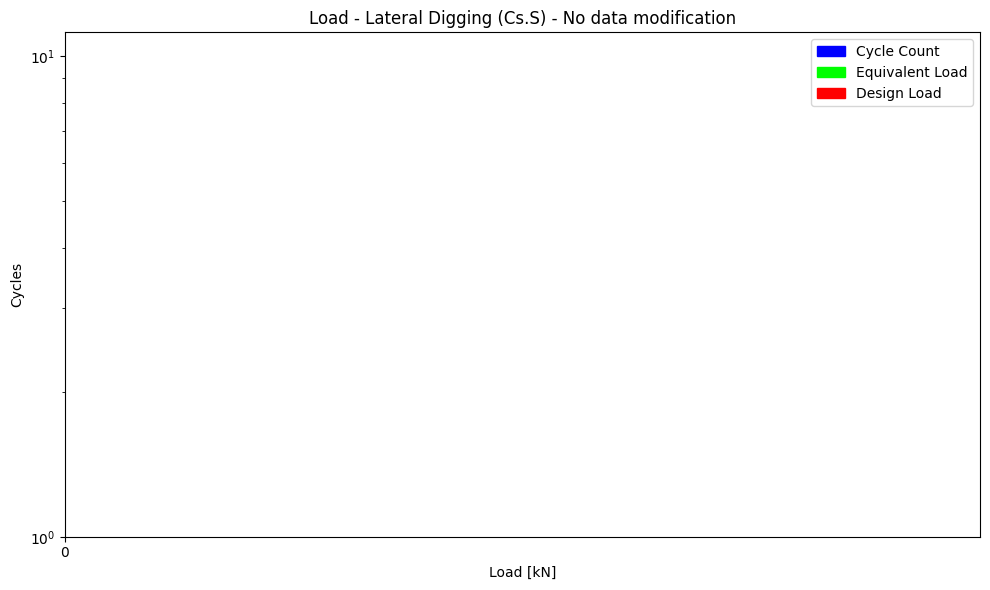

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np


# MAIN USER INPUTS
title = "Load - Lateral Digging (Cs.S) - No data modification"
equivalent_load = 120        #kN assumed 
design_load = 206            #kN assumed 

# SECONDARY USER INPUTS (plot manipulation stuff mostly, adjust as needed)
tick_spacing = 20
histogram_bars_width = 5
plot_vertical_lines = True              # vertical lines refers to additional lines for equivalent and design loads 
vertical_line_width = 8
height_vertical_lines = 2*10**6


# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Span'], df['Scaled Count'], width=histogram_bars_width, color='#0000ff')

# Set title and axis
plt.title(f'{title}')
plt.xlabel('Load [kN]')
plt.xlim(left=0)
# plt.xlim(right=500) #Temporary overwrite
plt.ylabel('Scaled Cycles')
plt.yscale('log')
plt.ylim(bottom=1)

# Generate x-axis ticks
x_min, x_max = 0, df['Span'].max()
# x_min, x_max = 0, 500 #Temporary overwrite
tick_positions = np.arange(0, x_max + tick_spacing, tick_spacing)  
plt.xticks(tick_positions)

# Add vertical lines
_, y_max = plt.ylim()
if plot_vertical_lines:
    plt.vlines(x=equivalent_load, ymin=1, ymax=min(height_vertical_lines, y_max), 
           color='#00ff00', linestyle='-', linewidth=vertical_line_width, alpha=0.8)
    plt.vlines(x=design_load, ymin=1, ymax=min(height_vertical_lines, y_max), 
           color='#ff0000', linestyle='-', linewidth=vertical_line_width, alpha=0.8)
    
# Create legen
blue_patch = mpatches.Patch(color='#0000ff', label='Cycle Count')
red_patch = mpatches.Patch(color='#00ff00', label=f'Equivalent Load')
green_patch = mpatches.Patch(color='#ff0000', label=f'Design Load')

# Add legend and show plot
plt.legend(handles=[blue_patch, red_patch, green_patch])
plt.tight_layout()
plt.show()


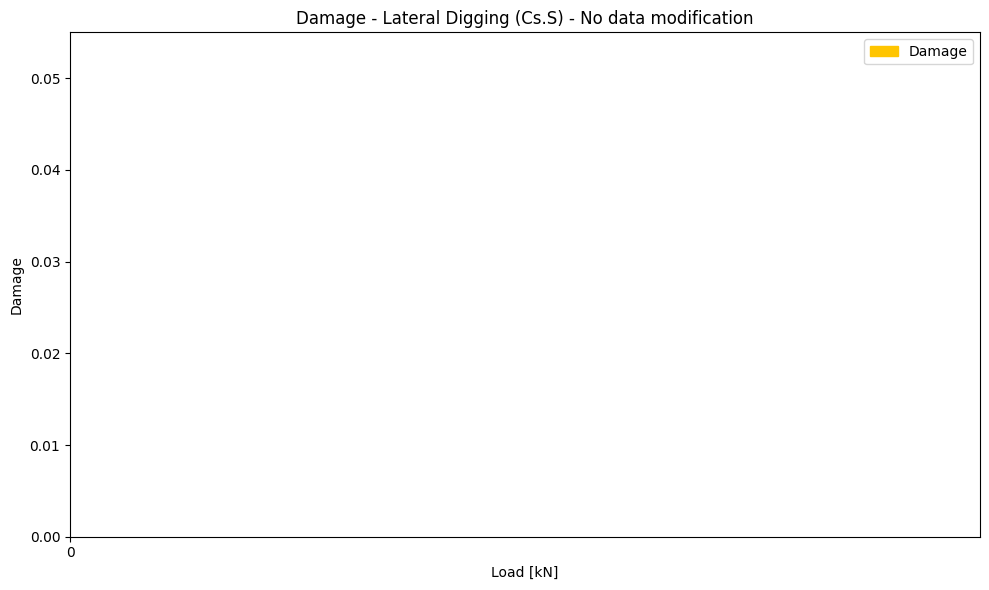

In [3]:
# MAIN USER INPUTS
title = "Damage - Lateral Digging (Cs.S) - No data modification"

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Span'], df['Damage'], width=histogram_bars_width, color='#ffa500')

# Set title and axis
plt.title(f'{title}')
plt.xlabel('Load [kN]')
plt.xlim(left=0)
# plt.xlim(right=500) #Temporary overwrite
plt.ylabel('Damage')
plt.ylim(bottom=0)

# Generate x-axis ticks
x_min, x_max = 0, df['Span'].max()
# x_min, x_max = 0, 500 #Temporary overwrite
tick_positions = np.arange(0, x_max + tick_spacing, tick_spacing)  
plt.xticks(tick_positions)
    
# Create legend
orange_patch = mpatches.Patch(color='#ffc500', label='Damage')


# Add legend and show plot
plt.legend(handles=[orange_patch])
plt.tight_layout()
plt.show()